1.회귀모델 성능평가 : 오차(예측값과 실제값의 차이)
- MSE, MAE, RMSE, RMSLE, MAPE 등등


2.분류모델 성능평가 : 맞춘 개수
- Accuracy, recall, precision, F1-score, ROC curve

재현율(Recall) : 실제 양성 중 정확히 맞춘 비율 <br>
정밀도(Precision) : 양성이라고 예측한것 중 정확히 맞춘 비율

### 실습
- iris 데이터 활용하여 품종분류!
- 상관관계
- 시각화
- 하이퍼 파라미터 튜닝

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

### 1. 문제 정의
- 꽃의 4가지 특성을 이용하여 iris 품종 분류
- 품종은 3가지( 3개의 클래스)

### 2. 데이터 수집
- sklearn 라이브러리 연습 데이터셋 활용

In [2]:
iris_data = load_iris() # --> 딕셔너리와 유사한 형태 데이터

In [3]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### 3. 전처리
- 결측치 확인
- 문자데이터는 수치데이터로 변경
- 스케일링

In [4]:
iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### 4. 데이터 탐색(EDA) - 시각화!
- 데이터 모양(shape)
- 정답데이터 클래스 종류/비율
- 정답데이터와 관련있는 특성은 무엇인지?
- 기술통계

In [6]:
iris_df.shape

(150, 4)

In [7]:
y = pd.Series(iris_data['target'])
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int32

In [8]:
y.value_counts()

2    50
1    50
0    50
dtype: int64

In [9]:
iris_df['label'] = y

In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
iris_df.corr() #상관계수 확인

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


In [12]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


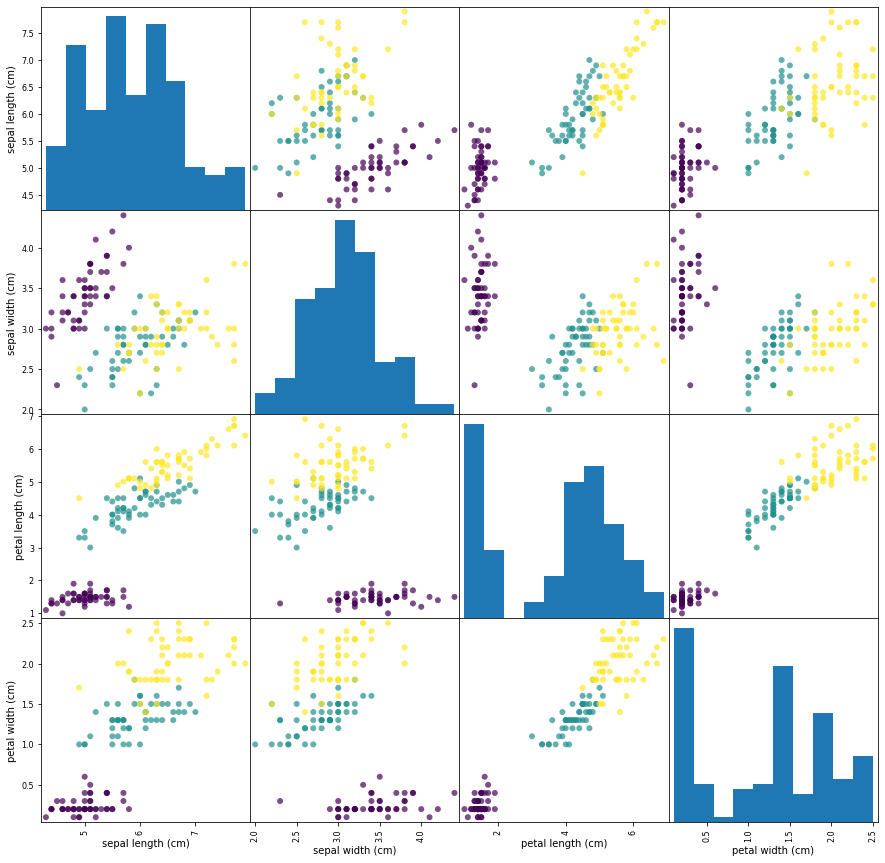

In [13]:
pd.plotting.scatter_matrix(iris_df.drop('label',axis=1),   #산점도(시각화)
                            figsize = (15,15), marker ='o', alpha = 0.7, c = y) # alpha : 투명도(0 : 투명 ~ 1 : 불투명)
plt.show()


### 5. 모델링( 모델 선택 / 하이퍼 파라미터 튜닝)
- KNN 모델
- 이웃 숫자 튜닝

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], test_size = 0.3, 
                                                   random_state=7)

In [15]:
train_score_list = []
test_score_list = []
for k in range(1, 99, 2) :
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    
    #점수
    train_score = knn_model.score(X_train,y_train)
    test_score = knn_model.score(X_test,y_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

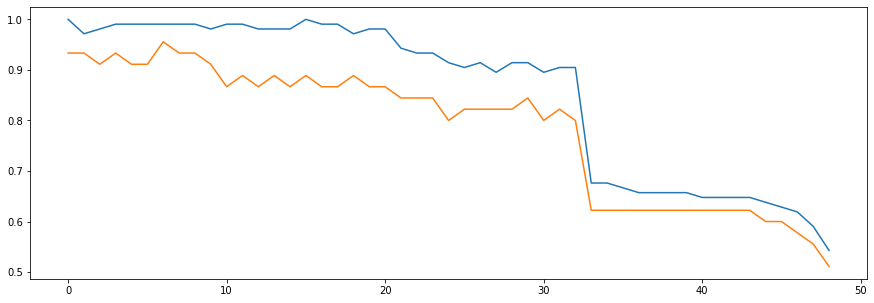

In [16]:
plt.figure(figsize=(15,5))
plt.plot(train_score_list)
plt.plot(test_score_list)
plt.show()